<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/NLP/FJP_DS_Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import re 
import  nltk 
nltk.download("all")
from sklearn.model_selection import train_test_split 


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [2]:
from nltk.corpus import stopwords 
from nltk.classify import SklearnClassifier 

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-March/main/NLP/Sentiment.csv')

In [4]:
data.head(3)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN


In [5]:
data = data[['text' , 'sentiment']]

In [6]:
data.head(3)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral


In [7]:
# splitting the data 
train , test = train_test_split(data , test_size = 0.1 ,random_state = 42)

In [8]:
train 

,text,sentiment
1512,RT @kvxrdashian: when you leave the Republican...,Neutral
5331,"""At #GOPDebate, I won over our largest audienc...",Neutral
3573,RT @Smethanie: If women abort their rape babie...,Negative
6301,Posting this at the risk of enflaming the situ...,Negative
13502,I really like Ben Carson so far. He's been cla...,Positive
...,...,...
5191,Love when the #GOPDebate takes over @mamasbarn...,Positive
13418,"RT @monaeltahawy: #WhereRWomen I'm in #Cairo, ...",Negative
5390,It's very interesting that every one of the GO...,Negative
860,Chris Christie tried to wrap himself in 9/11 (...,Negative


In [9]:
test 

,text,sentiment
5040,"To me, the real winner of last night #GOPDebat...",Positive
1078,"RT @DanScavino: .@megynkelly,\nSome results on...",Positive
13717,I'm going to bed...@JohnKasich gets my vote to...,Positive
3527,@FoxNews after last night's #GOPDebate @Real...,Positive
3404,RT @TCPalmKGardner: Who told the truth and who...,Neutral
...,...,...
6084,You might have thought #Obamacare would be a #...,Neutral
653,RT @adillard4: Unlike #GOPDebate we'll talk ra...,Negative
3210,"RT @ImmigranNacion: @RandPaul #GOPDebate #USA,...",Negative
1475,RT @Rebeksy: .@ChrisChristie have you USED the...,Negative


In [10]:
# removing neutral sentiments 

train = train[train['sentiment'] != 'Neutral']

In [11]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']


train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [12]:
train_pos , train_neg 

(13502    I really like Ben Carson so far. He's been cla...
 10090    #bencarson went hard at the end and busted in ...
 10661    RT @RWSurferGirl: I think Cruz and Trump need ...
 5372     RT @ChuckNellis: YES!!!! @krauthammer said @Te...
 6489     RT @Thomasismyuncle: Good question by Chris Wa...
                                ...                        
 1184     RT @LessGovMoreFun: . "The American People Wan...
 6265     RT @AmnaKhalid: “If I have to monitor a mosque...
 5734     RT @kesgardner: Huckabee: Reagan was "trust bu...
 5191     Love when the #GOPDebate takes over @mamasbarn...
 7270     RT @DabneyPorte: Ohhhh #BenCarson. Your honest...
 Name: text, Length: 2002, dtype: object,
 3573     RT @Smethanie: If women abort their rape babie...
 6301     Posting this at the risk of enflaming the situ...
 11741    RT @RWSurferGirl: After @GovChristie hugged Ob...
 13718    RT @SupermanHotMale: One crash of the economy ...
 13186    After @GovChristie hugged Obama he doesn't des..

Positive words 


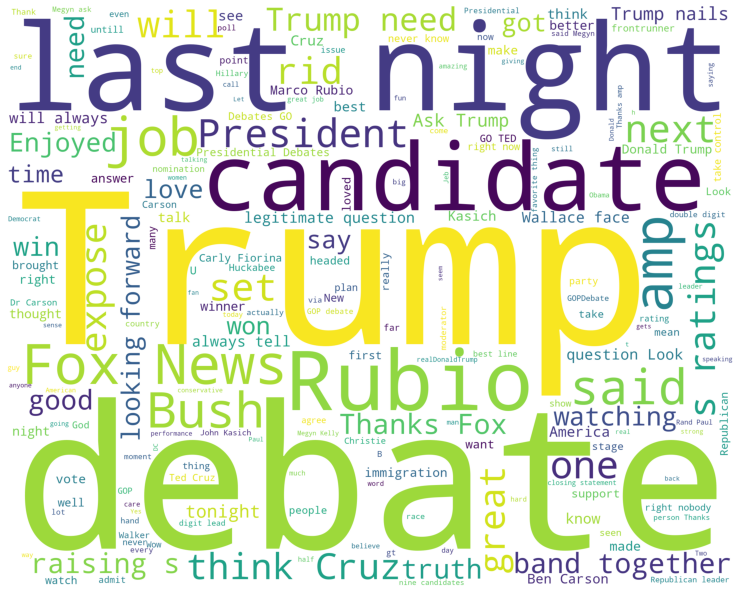

-------------------------------------------------------------
Negative words


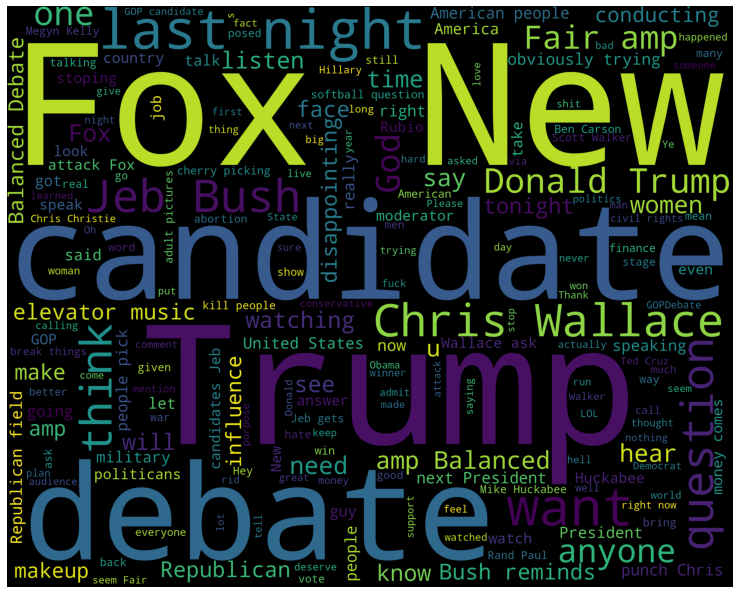

In [13]:
def wordcloud_draw(data , color = 'black'):
  words = ' '.join(data)
  words = [word for word in words.split() if 'http' not in word and not word.startswith("@") and not word.startswith("#") and word != "RT"]
  cleaned = " ".join(words)
  wordcloud = WordCloud(stopwords = STOPWORDS , 
                        background_color = color ,
                        width = 2500 ,
                        height = 2000)
  wordcloud.generate(cleaned)
  plt.figure(1 , figsize = (13 , 13))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()


print('Positive words ')
wordcloud_draw(train_pos , 'white')
print("-------------------------------------------------------------")
print('Negative words')
wordcloud_draw(train_neg , 'black')

In [14]:
tweets = []
stopwords = stopwords.words('english')

In [15]:
# cleaning and processing 

for index , row in train.iterrows():
  words = [word.lower() for word in row['text'].split() if len(word) >= 3]
  words = [ word for word in words if 'https' not in word and not word.startswith("@") and not word.startswith("#") and word != 'RT']
  words = [word for word in words if not word in stopwords] 
  tweets.append((words , row['sentiment']))

In [16]:
pd.DataFrame(tweets )

,0,1
0,"[women, abort, rape, babies,, fetuses, come, b...",Negative
1,"[posting, risk, enflaming, situation., worth, ...",Negative
2,"[really, like, ben, carson, far., he's, classy...",Positive
3,"[went, hard, end, busted, face]",Positive
4,"[hugged, obama, deserve, stage, tonight.]",Negative
...,...,...
9644,"[love, takes, hair, looks, great, big, screen,...",Positive
9645,"[i'm, often, rail, misogyny, politics., men,, ...",Negative
9646,"[interesting, every, one, gop, candidates, hat...",Negative
9647,"[chris, christie, tried, wrap, 9/11, (giuliani...",Negative


In [17]:
test_pos = test[test['sentiment'] == 'Positive']
test_pos = test_pos['text']

test_neg = test[test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [19]:
def get_words_in_tweets(tweets):
  all = []
  for (words , sentiment) in tweets: 
    all.extend(words)
  return all

In [20]:
def get_word_features(wordlist):
  wordlist = nltk.FreqDist(wordlist)
  features = wordlist.keys() 
  return features , wordlist 

In [21]:
w_features , wordlist = get_word_features(get_words_in_tweets(tweets))

In [25]:
type(wordlist )

nltk.probability.FreqDist

In [23]:
 w_features 

dict_keys(['women', 'abort', 'rape', 'babies,', 'fetuses', 'come', 'back', 'zombies', 'dig', 'holes', 'fence', 'let', 'mexicans', 'posting', 'risk', 'enflaming', 'situation.', 'worth', 'read.', 'http://t.co/mpfchuirt6', 'really', 'like', 'ben', 'carson', 'far.', "he's", 'classy', '&amp;', 'answers.', 'went', 'hard', 'end', 'busted', 'face', 'hugged', 'obama', 'deserve', 'stage', 'tonight.', 'one', 'crash', 'economy', 'way', 'want', 'again,', 'thanks!!!', 'storming', 'directv', 'satellite', 'coming', 'going.', 'know', 'donald', 'actually', '^answers^', 'question!', 'enough', 'hating', 'trump', 'misogynist!', 'get', 'part', 'guys', 'debate', 'whether', 'amy', 'schumer', 'fuckable…', 'now.', 'people', 'might', 'next', 'one.', 'rip', 'everything.', 'http://t.co…', 'senator', 'cruz,', 'word', 'god?', 'spit', 'tequila.', 'damn', 'megyn', 'kelly,', 'expensive', 'kind.', 'thoughts', 'much', 'time', 'everyone', "can't", 'answer', 'succinctly.', 'bottom', 'line:', 'fox', 'news', 'lost', 'debate.

In [26]:
def extract_features(documents):
  doc = set(documents)
  features = {} 
  for word in w_features:
    features['contains(%s) ' % word] = (word in doc)
  return features 

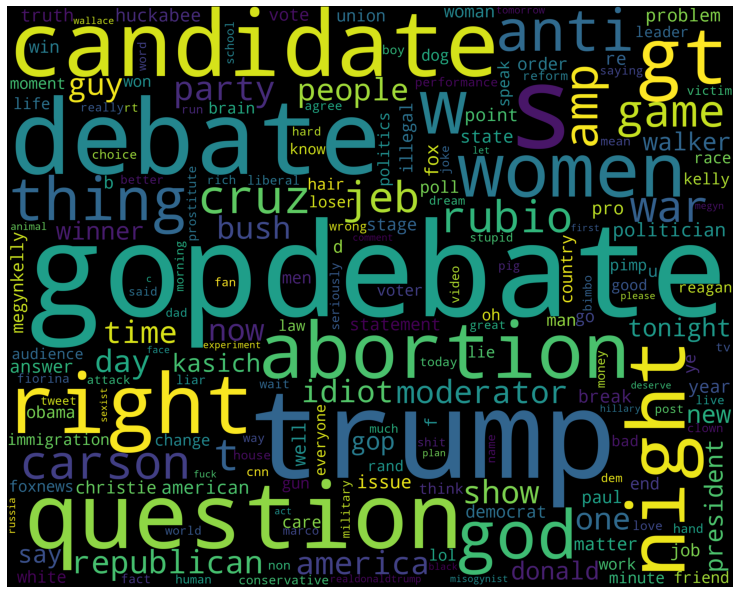

In [27]:
wordcloud_draw(w_features )

In [28]:
## Training a naive_bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)

In [29]:
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [30]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 846/811 
[Positive]: 234/81 


In [31]:
len(train_pos) , len(train_neg),  len(data)

(2002, 7647, 13871)